In [116]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
! pip install seaborn as sns

In [118]:
import seaborn as sns

In [9]:
import numpy as np

In [44]:
train_data = pd.read_csv('train_iris.csv',  index_col=0)

In [65]:
X_train = train_data.drop(['species'], axis = 1)
y_train = train_data['species']

In [66]:
X_train

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5
...,...,...,...,...
147,6.5,3.0,5.2,2.0
124,6.7,3.3,5.7,2.1
123,6.3,2.7,4.9,1.8
146,6.3,2.5,5.0,1.9


In [46]:
np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [48]:
clf.score(X_train, y_train)

0.7

In [49]:
general_tables = pd.DataFrame()

In [102]:
for max_depth_values in range(1,100):
    clff = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth_values)
    clff.fit(X_train, y_train)
    train_score = clff.score(X_train, y_train)
    accuracy_score = clff.score(X_test, y_test)
    
    tables = pd.DataFrame({'max_depth': [max_depth_values], 
                          'train_score': [train_score],
                           'accuracy_score': [accuracy_score]})
    
    general_tables = general_tables.append(tables)

In [104]:
general_tables

,max_depth,train_score,accuracy_score
0,1,0.70,NaN
0,2,0.97,NaN
0,3,0.99,NaN
0,4,1.00,NaN
0,5,1.00,NaN
...,...,...,...
0,95,1.00,0.94
0,96,1.00,0.94
0,97,1.00,0.92
0,98,1.00,0.94


In [68]:
data_test = pd.read_csv('test_iris.csv', index_col=0)

In [70]:
X_test = data_test.drop(['species'], axis = 1)
y_test = data_test.species

In [107]:
scores_data_long = pd.melt(general_tables, id_vars = ['max_depth'], value_vars = ['train_score', 'accuracy_score'],
                           var_name = 'set_type', value_name = 'score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

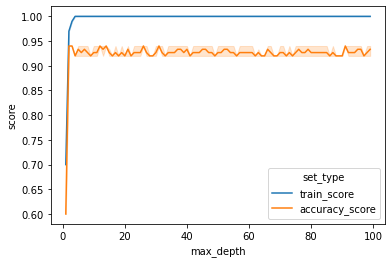

In [119]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

NameError: name 'sns' is not defined